In [183]:
import torch
import torch.nn as nn
import glob
import cv2
import torch.nn.functional as F
from torchvision.transforms import Compose
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from scipy.ndimage import uniform_filter, gaussian_filter


In [184]:
class RED_Net_20(nn.Module):
    """
    This baseline is 20-layered residual encoder-decoder neural network
    with symmetric skip-connections between convolutional and deconvolutional
    layers with step 2, ReLU activations, filters of constant size 3x3, constant
    number of channels (128) in activations of each layer, padding = 1, stride = 1,
    no max-pooling.
    """

    def __init__(self):
        super(RED_Net_20, self).__init__()

        self.conv_1 = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_2 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_3 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_4 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_5 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_6 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_7 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_8 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_9 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.conv_10 = nn.Sequential(
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_1 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_2 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_3 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_4 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_5 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_6 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_7 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_8 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_9 = nn.Sequential(
            nn.ConvTranspose2d(64, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True)
        )

        self.deconv_10 = nn.Sequential(
            nn.ConvTranspose2d(64, 1, 3, stride=1, padding=1),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

    def forward(self, X):
        X = self.conv_1(X)
        X = self.conv_2(X)

        X_3 = self.conv_3(X)
        X = self.conv_4(X_3)

        X_5 = self.conv_5(X)
        X = self.conv_6(X_5)

        X_7 = self.conv_7(X)

        X = self.conv_8(X_7)
        X_9 = self.conv_9(X)

        X = self.conv_10(X_9)
        X = self.deconv_1(X)

        X = self.deconv_2(F.relu(X + X_9))
        X = self.deconv_3(X)

        X = self.deconv_4(F.relu(X + X_7))
        X = self.deconv_5(X)

        X = self.deconv_6(F.relu(X + X_5))
        X = self.deconv_7(X)

        X = self.deconv_8(F.relu(X + X_3))
        X = self.deconv_9(X)

        X = self.deconv_10(X)

        return X
class Conv_block(torch.nn.Module):
    def __init__(self, inp, out, kernel=3, st=1, pad=1, batch=64):
        super(Conv_block, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=inp, out_channels=out, kernel_size=kernel, stride=st, padding=pad),
            nn.BatchNorm2d(batch),
            nn.ReLU(True)
        )

    def forward(self, x):
        return self.conv(x)

class Deconv_block(torch.nn.Module):
    def __init__(self, out, kernel=3, st=1, pad=1, batch=64):
        super(Deconv_block, self).__init__()

        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(in_channels=out, out_channels=out, kernel_size=kernel, stride=st, padding=pad),
            nn.BatchNorm2d(batch),
            nn.ReLU(True)
        )

    def forward(self, x):
        return self.deconv(x)



class DnCNN(nn.Module):
    def __init__(self, channels, num_of_layers=17):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        features = 64
        layers = []
        layers.append(nn.Conv2d(in_channels=channels, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(num_of_layers-2):
            layers.append(nn.Conv2d(in_channels=features, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(features))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=features, out_channels=channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
    def forward(self, x):
        out = self.dncnn(x)
        return out
    
class RandomCrop:
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        print(sample)
        X, Y = sample['X'], sample['Y']
        size = 128
                
        h, w = X.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        X = X[(h-size)//2: (h+size)//2,
             (w-size)//2: (w+size)//2]

        Y = Y[(h-size)//2: (h+size)//2,
             (w-size)//2: (w+size)//2]

        return {'X': X,
                'Y': Y}

class DnCNN(nn.Module):
    def __init__(self, channels, num_of_layers=17):
        super(DnCNN, self).__init__()
        kernel_size = 3
        padding = 1
        features = 64
        layers = []
        layers.append(nn.Conv2d(in_channels=channels, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
        layers.append(nn.ReLU(inplace=True))
        for _ in range(num_of_layers-2):
            layers.append(nn.Conv2d(in_channels=features, out_channels=features, kernel_size=kernel_size, padding=padding, bias=False))
            layers.append(nn.BatchNorm2d(features))
            layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(in_channels=features, out_channels=channels, kernel_size=kernel_size, padding=padding, bias=False))
        self.dncnn = nn.Sequential(*layers)
    def forward(self, x):
        out = self.dncnn(x)
        return out
    
class ToFloat:
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        X, Y = sample['X'], sample['Y']

        X = X / 255
        Y = Y / 255

        return {'X': X,
                'Y': Y}

class ToTensor:
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        X, Y = sample['X'], sample['Y']

        if len(X.shape) == 2:
            X = X[:, :, None]
            Y = Y[:, :, None]

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        X = X.transpose((2, 0, 1))
        Y = Y.transpose((2, 0, 1))
        return {'X': torch.tensor(X, dtype=torch.float32),
                'Y': torch.tensor(Y, dtype=torch.float32)}

def _assert_compatible(im1, im2):
    """Raise an error if the shape and dtype do not match."""
    if not im1.shape == im2.shape:
        raise ValueError('Input images must have the same dimensions.')
    return

def _as_floats(im1, im2):
    """Promote im1, im2 to nearest appropriate floating point precision."""
    float_type = np.result_type(im1.dtype, im2.dtype, np.float32)
    im1 = np.asarray(im1, dtype=float_type)
    im2 = np.asarray(im2, dtype=float_type)
    return im1, im2

def MSE(im1, im2):
    """Compute the mean-squared error between two images.
    Parameters
    ----------
    im1, im2 : ndarray
        Image.  Any dimensionality.
    Returns
    -------
    mse : float
        The mean-squared error (MSE) metric.
    """
    _assert_compatible(im1, im2)
    im1, im2 = _as_floats(im1, im2)
    return np.mean(np.square(im1 - im2), dtype=np.float64)

    
def PSNR(ref_img, pred_img):
    """
    Compute average PSNR score for a batch of pairs of images

    :param ref_img: ndarray of shape (batch_size, width, height, channels) with target noise-free image
    :param pred_img: ndarray of shape (batch_size, width, height, channels) with predicted denoised image
    :return: float, averaged over batch PSNR score
    """
    dtype_range = {np.bool_: (False, True),
               np.bool8: (False, True),
               np.float16: (-1, 1),
               np.float32: (-1, 1),
               np.float64: (-1, 1)}
    _assert_compatible(ref_img, pred_img)
    dmin, dmax = dtype_range[ref_img.dtype.type]
    true_min, true_max = np.min(ref_img), np.max(ref_img)
    if true_max > dmax or true_min < dmin:
        raise ValueError(
            "im_true has intensity values outside the range expected for "
            "its data type.  Please manually specify the data_range")
    if true_min >= 0:
        # most common case (255 for uint8, 1 for float)
        data_range = dmax
    else:
        data_range = dmax - dmin

    ref_img, pred_img = _as_floats(ref_img, pred_img)

    err = MSE(ref_img, pred_img)
    return 10 * np.log10((data_range ** 2) / err)


    

transform = Compose([
                        RandomCrop(128),
                        ToFloat(),
                        ToTensor()]
                      )

In [186]:
dtype_range = {np.bool_: (False, True),
               np.bool8: (False, True),
               np.float16: (-1, 1),
               np.float32: (-1, 1),
               np.float64: (-1, 1)}



In [187]:
glob.glob('trained-models/*.pt')

['trained-models/L1Loss_RedNet.pt',
 'trained-models/SSIM_RedNet.pt',
 'trained-models/MSELoss_RedNet.pt',
 'trained-models/VGG31_RedNet.pt',
 'trained-models/VGG11_RedNet.pt',
 'trained-models/SR_Sim_RedNet.pt',
 'trained-models/VGG34_RedNet.pt']

In [189]:
import piq

{'X': array([[ 85, 120, 170, ..., 208, 166, 159],
       [117, 161, 171, ..., 179, 147, 133],
       [108, 169, 159, ..., 173, 167, 143],
       ...,
       [134, 144, 186, ..., 254, 224, 197],
       [165, 167, 213, ..., 243, 255, 255],
       [174, 172, 203, ..., 243, 255, 254]], dtype=uint8), 'Y': array([[159, 176, 194, ..., 161, 166, 159],
       [167, 188, 196, ..., 156, 163, 160],
       [179, 200, 194, ..., 150, 158, 159],
       ...,
       [168, 177, 190, ..., 205, 228, 228],
       [155, 164, 178, ..., 219, 235, 225],
       [160, 167, 180, ..., 218, 227, 231]], dtype=uint8)}


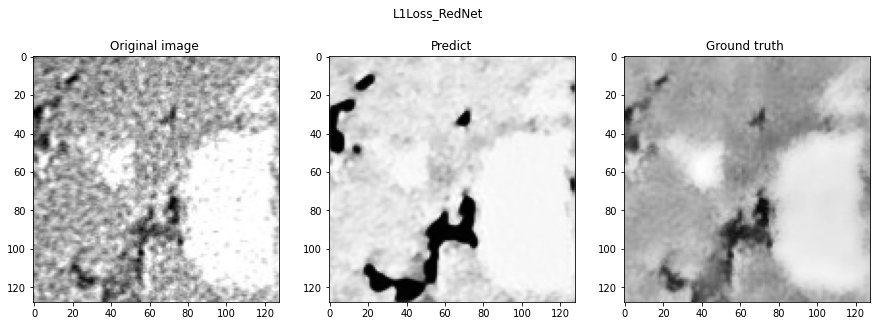

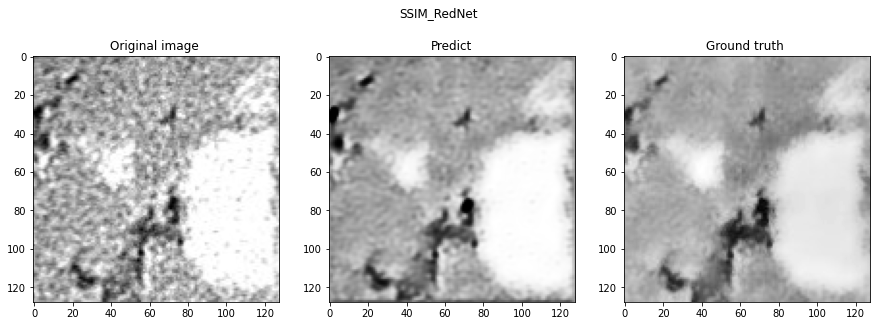

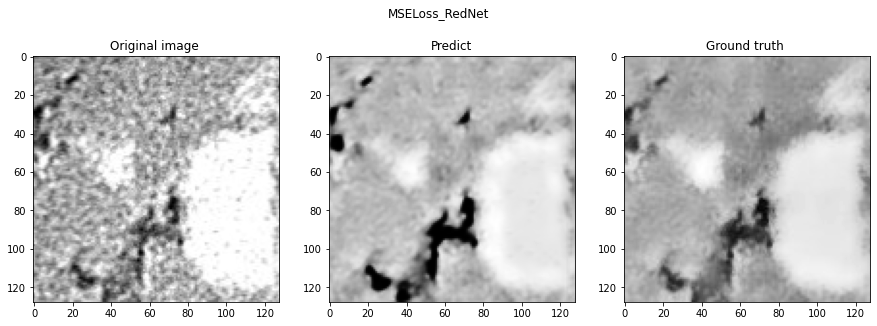

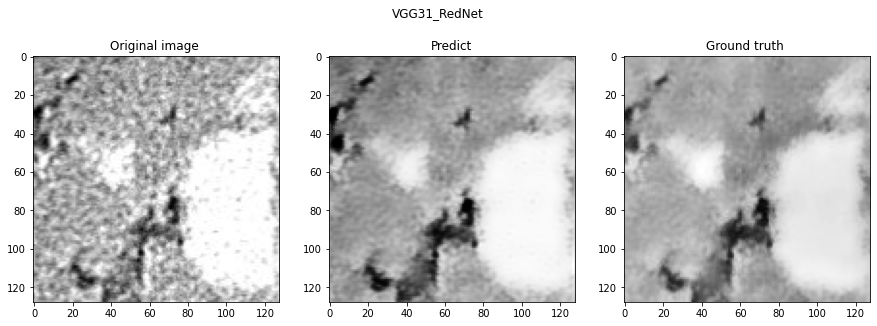

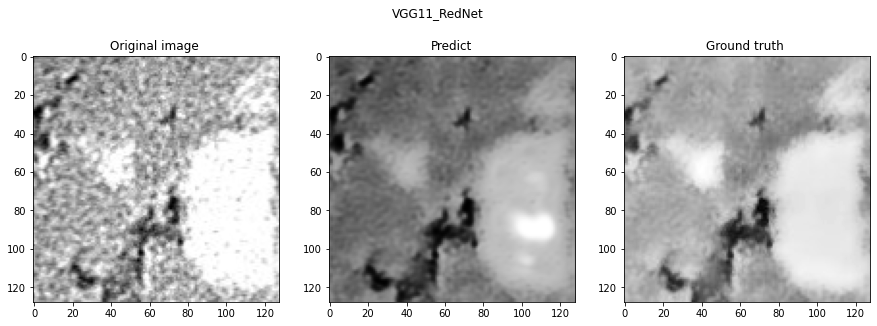

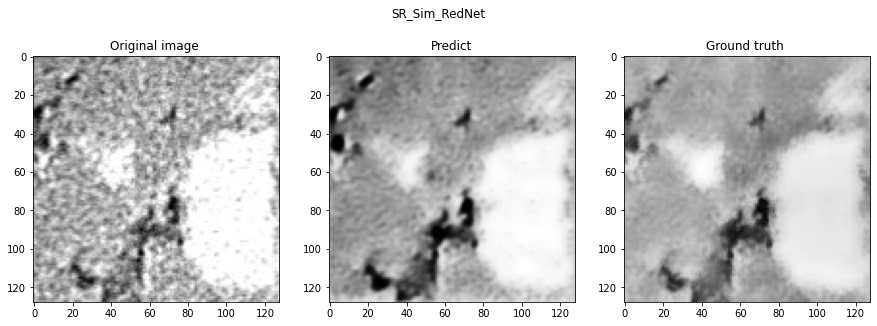

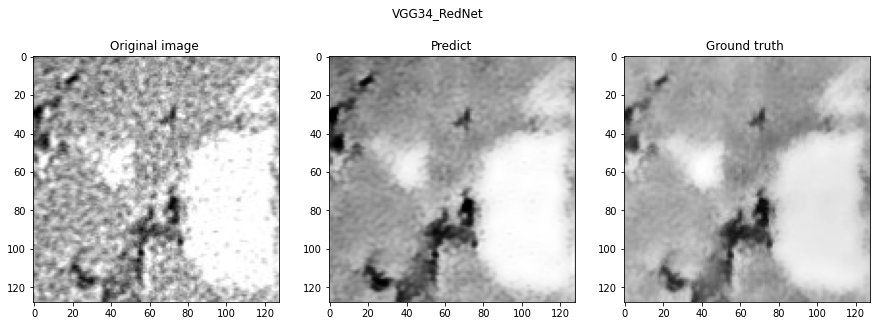

In [201]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weight_files = [file for file in glob.glob('trained-models/*.pt')]

path_to_img = 'Images/B/'
predict = 'Original/B_Original_0019.jpg'
gr_truth = 'Filtered/B_Filtered_0019.jpg'

dim = (402, 402)
o_img = cv2.imread(path_to_img + predict, 0)
f_img = cv2.imread(path_to_img + gr_truth, 0)
o_img = cv2.resize(o_img, dim, interpolation=cv2.INTER_AREA)
f_img = cv2.resize(f_img, dim, interpolation=cv2.INTER_AREA)
sample = {'X': o_img, 'Y': f_img}
sample = transform(sample)
# plt.figure(figsize=(8, 6), dpi=80)

for en, wt in enumerate(weight_files):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    name = wt[wt.rfind('/')+1: wt.find('.')]
    
#     model = DnCNN(channels = 1)
    model = RED_Net_20()

    model = nn.DataParallel(model, device_ids=[0, 1]).to(device)
    model.load_state_dict(torch.load(wt)['model_state_dict'])
        
    X, Y_true = sample['X'], sample['Y']
    X_old = X
    X = X.unsqueeze(0)
    # transfer tensors to the current device
    X = X.to(device)
    Y_true = Y_true.to(device)
    

    # forward propagate
    with torch.no_grad():
        Y_pred = model(X)
        Y_pred = Y_pred.squeeze(0)
        
    ax[0].imshow(X_old.numpy()[0], cmap = 'gray')
#     ax[0].set_title(f'Original image - {compare_psnr(X_old.detach().cpu().numpy()[0], Y_true.detach().cpu().numpy()[0])}') 
    ax[0].set_title(f'Original image ') 
    
    img_pred = Y_pred.detach().cpu().numpy()[0]
    img_true = Y_true.detach().cpu().numpy()[0]
    normalized_pred = (img_pred-img_pred.min())/(img_pred.max()-img_pred.min())
    normalized_true = (img_true-img_true.min())/(img_true.max()-img_true.min())
    
    
#     Y_true = Y_true.unsqueeze(0)
#     Y_true_norm = (Y_true - Y_true.min())/(Y_true.max() - Y_true.min())
    
#     Y_pred = Y_pred.unsqueeze(0)
#     Y_pred_norm = (Y_pred - Y_pred.min()) / (Y_pred.max() - Y_pred.min())

    
    

    ax[1].imshow(normalized_pred, cmap = 'gray')
    ax[1].set_title(f'Predict') 
    ax[2].imshow(normalized_true, cmap = 'gray')
    ax[2].set_title(f'Ground truth ') 
#     print(name, 'SSIM', piq.ssim(Y_true_norm, Y_pred_norm, data_range=1.))

#     ax[2].set_title(f'Ground truth - {compare_psnr(Y_pred.detach().cpu().numpy()[0], Y_true.detach().cpu().numpy()[0]):.3f}') 
    plt.suptitle(wt[wt.rfind('/')+1: wt.find('.')])
    cv2.imwrite(name + 'predict.jpg', Y_pred.cpu().numpy()[0] * 255)


